In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [75]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [76]:
# veri setine ait kolonlar
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [81]:
# veri setinin satır ve sütun sayısı
customers.shape

(500, 8)

In [82]:
# veri setine ait bilgiler
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [83]:
# veri setindeki değişkenlerin incelenmesi
customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [85]:
# sütunlardaki eksik değerlerin toplamı
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [77]:
customers['Email'].value_counts()

Email
mstephenson@fernandez.com        1
elizabeth61@berg-braun.com       1
pamelahampton@martin-cobb.com    1
dbell@hotmail.com                1
vancealicia@hotmail.com          1
                                ..
stevenking@patterson.com         1
blevinseric@stephens.com         1
campbellross@yahoo.com           1
casey21@johnson.com              1
hannahwilson@davidson.com        1
Name: count, Length: 500, dtype: int64

In [78]:
customers['Address'].value_counts()

Address
835 Frank Tunnel\nWrightmouth, MI 82180-9605                      1
649 King Extension\nNorth April, NY 54175                         1
91542 Jessica Springs Suite 255\nThomashaven, MT 39239-3790       1
3485 Anthony Street Apt. 119\nMikeberg, FL 32602                  1
06307 Scott Spurs Suite 161\nJessicaburgh, NH 26093-5908          1
                                                                 ..
94730 Martin Mount\nNew Matthew, VI 08142-6708                    1
PSC 3676, Box 1549\nAPO AE 26130-7683                             1
6218 Michael Station Apt. 982\nSalazarburgh, NJ 79955             1
691 Johnson Field Apt. 510\nMichaelville, VI 78140                1
49791 Rachel Heights Apt. 898\nEast Drewborough, OR 55919-9528    1
Name: count, Length: 500, dtype: int64

In [79]:
customers['Avatar'].value_counts()

Avatar
SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: count, Length: 138, dtype: int64

In [84]:
# nicel değişkenlere ait bilgiler
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Veri Görselleştirme

<Axes: >

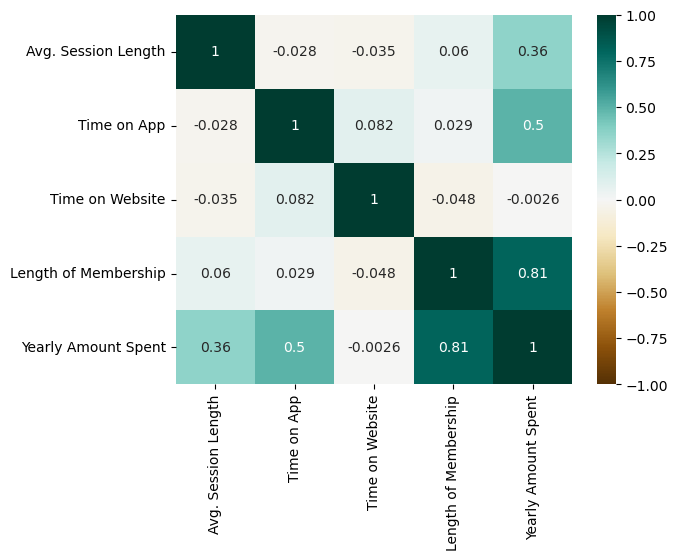

In [87]:
customers_num = customers.select_dtypes(exclude = ['object'])  #nicel verilerin seçilmesi
sns.heatmap(customers_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

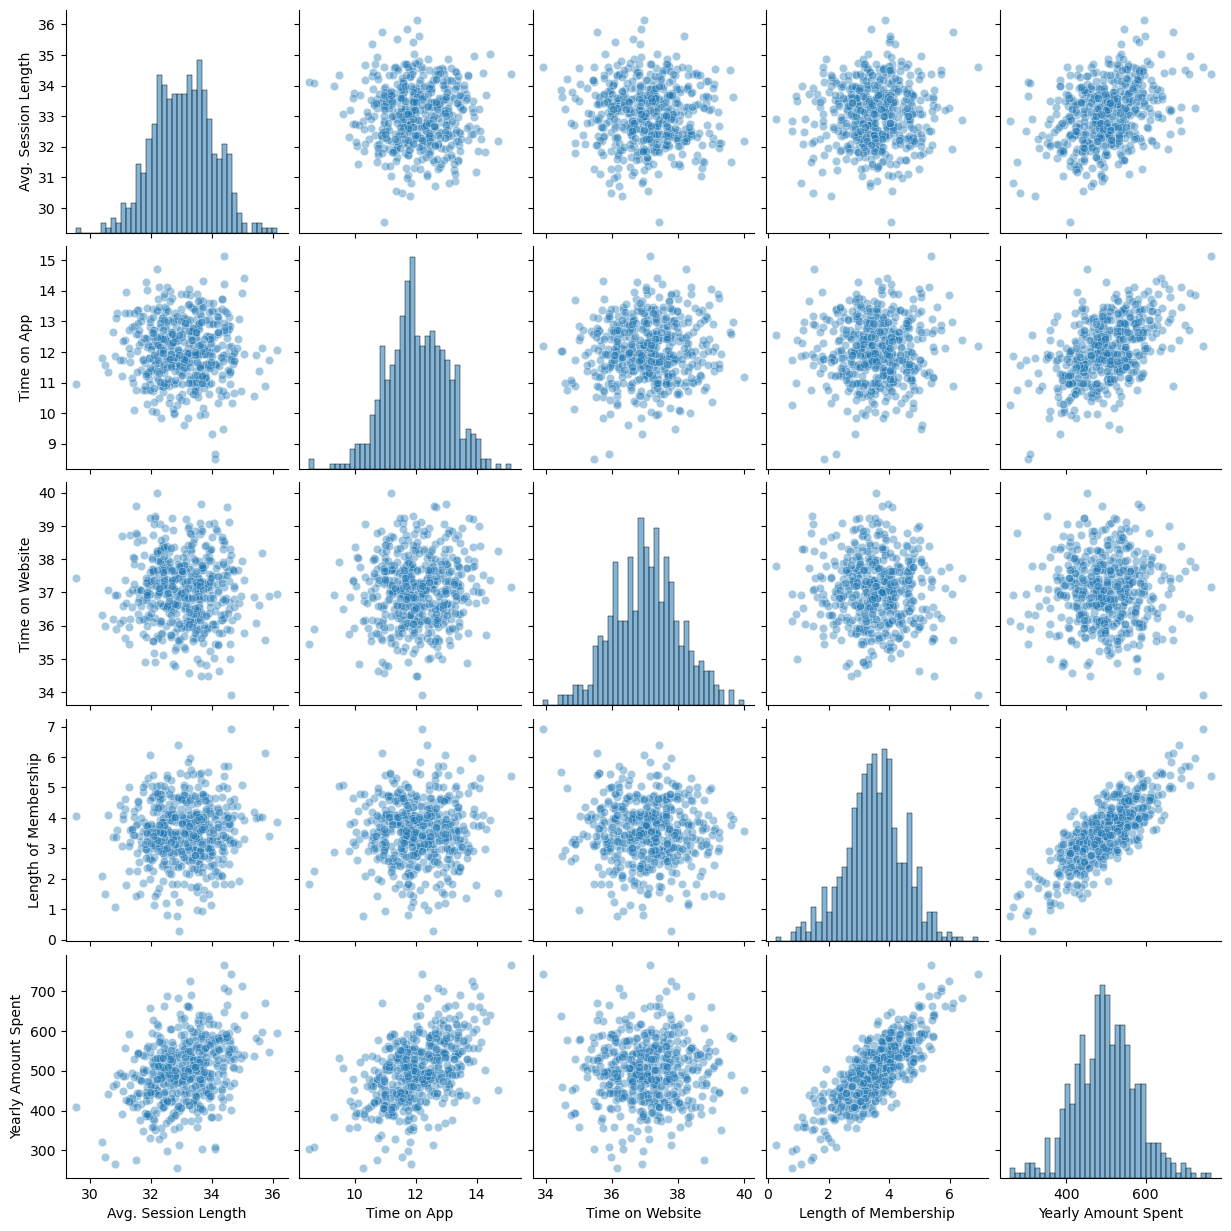

In [88]:
sns.pairplot(customers, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

Text(37.597222222222214, 0.5, 'Müşterinin Yıllık Harcama Tutarı')

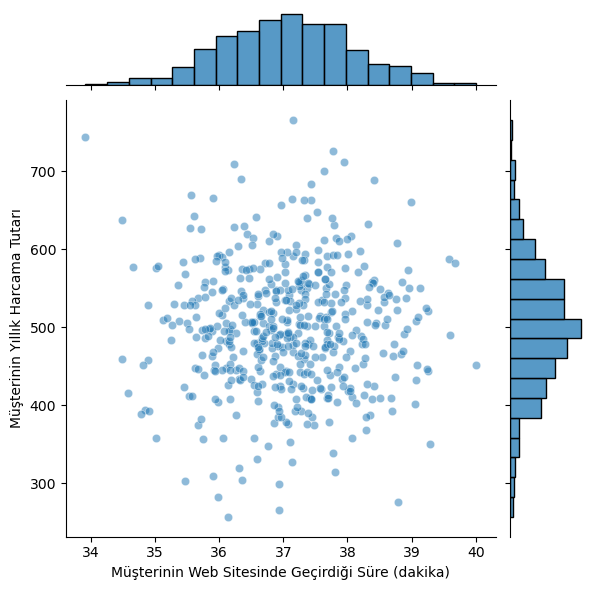

In [89]:
# Web Sitesinde Geçirilen Süre ve Yıllık Harcama Tutarı sütunlarını arasındaki ilişki

sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)
plt.xlabel('Müşterinin Web Sitesinde Geçirdiği Süre (dakika)')
plt.ylabel('Müşterinin Yıllık Harcama Tutarı')

Text(37.597222222222214, 0.5, 'Müşterinin Yıllık Harcama Tutarı')

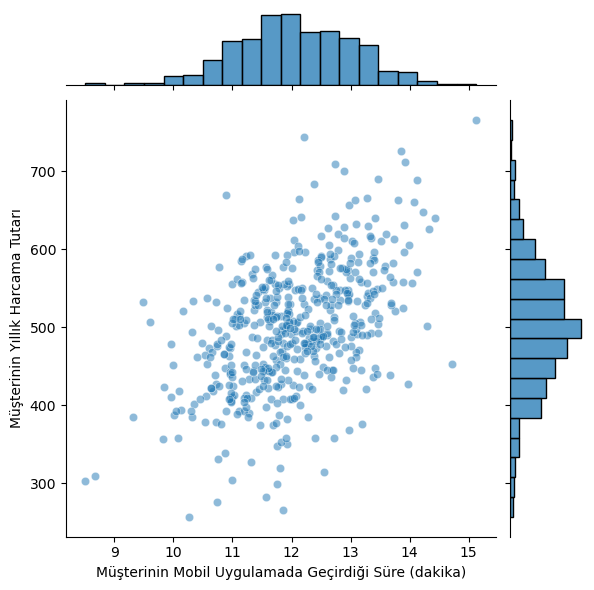

In [90]:
# Mobil uygulamada geçirilen süre ile yıllık harcama tutarı arasındaki ilişki

sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)
plt.xlabel('Müşterinin Mobil Uygulamada Geçirdiği Süre (dakika)')
plt.ylabel('Müşterinin Yıllık Harcama Tutarı')

Text(37.597222222222214, 0.5, 'Müşterinin Yıllık Harcama Tutarı')

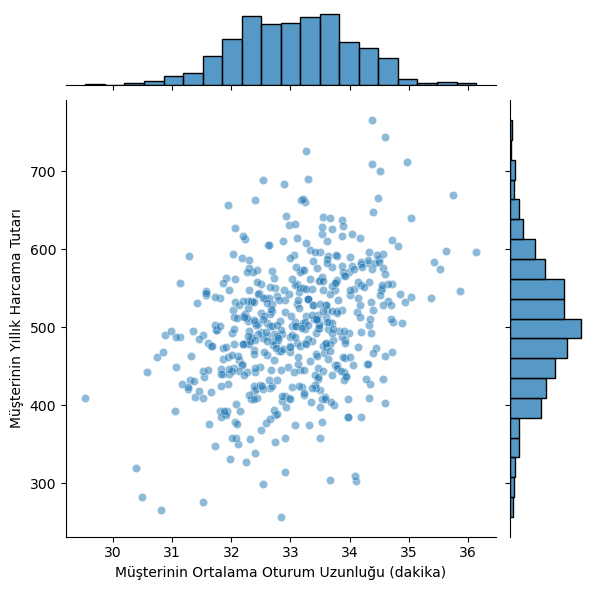

In [91]:
# Ortalama oturum uzunluğu ile yıllık harcama tutarı arasındaki ilişki

sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=customers, alpha=0.5)
plt.xlabel('Müşterinin Ortalama Oturum Uzunluğu (dakika)')
plt.ylabel('Müşterinin Yıllık Harcama Tutarı')

Text(37.597222222222214, 0.5, 'Müşterinin Yıllık Harcama Tutarı')

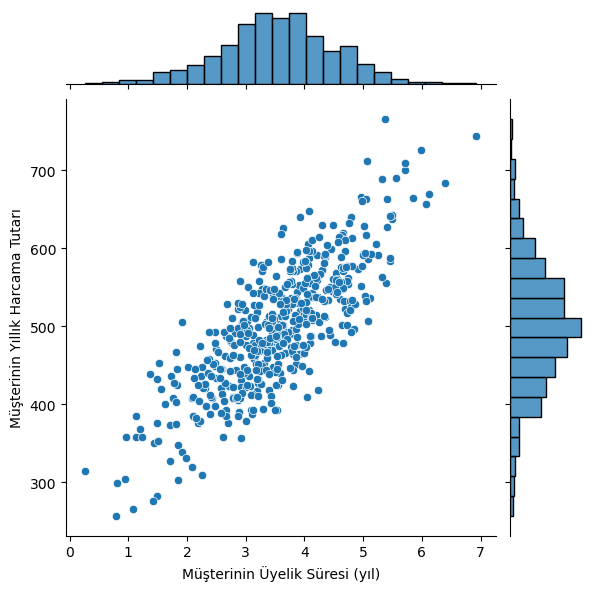

In [92]:
# üyelik süresi ile yıllık harcama tutarı arasındaki ilişki

sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.xlabel('Müşterinin Üyelik Süresi (yıl)')
plt.ylabel('Müşterinin Yıllık Harcama Tutarı')

C:\Users\MONSTER_PC\AppData\Local\Temp\ipykernel_16476\4193531354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customers[col], palette="viridis")


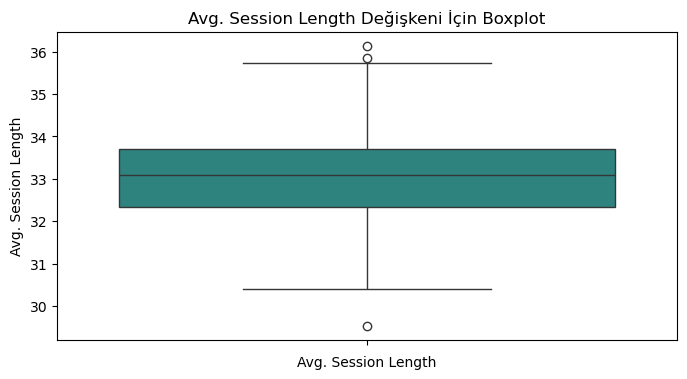

C:\Users\MONSTER_PC\AppData\Local\Temp\ipykernel_16476\4193531354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customers[col], palette="viridis")


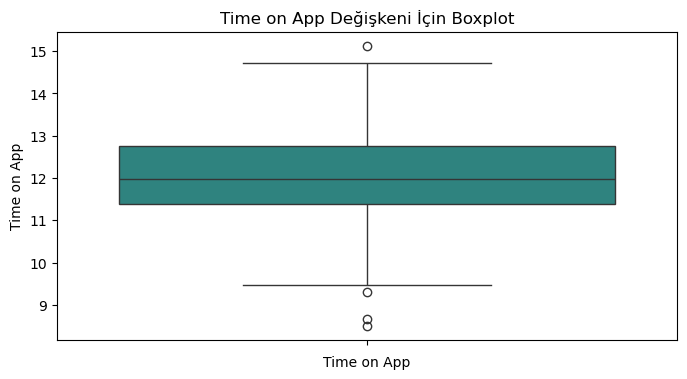

C:\Users\MONSTER_PC\AppData\Local\Temp\ipykernel_16476\4193531354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customers[col], palette="viridis")


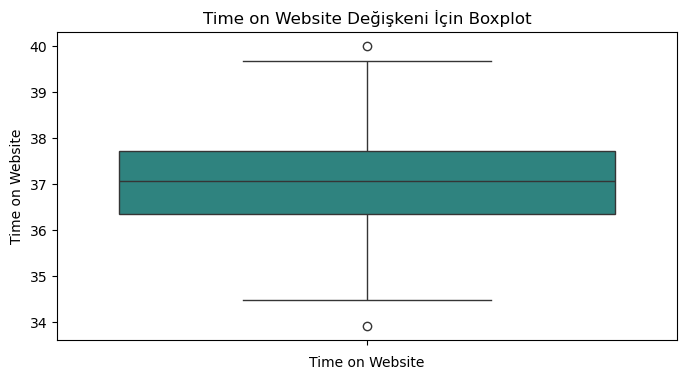

C:\Users\MONSTER_PC\AppData\Local\Temp\ipykernel_16476\4193531354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customers[col], palette="viridis")


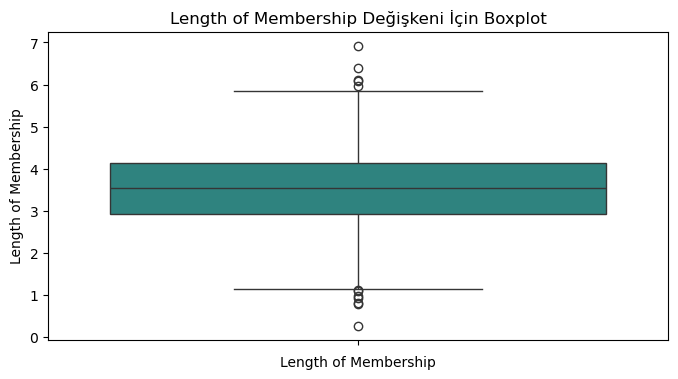

C:\Users\MONSTER_PC\AppData\Local\Temp\ipykernel_16476\4193531354.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(customers[col], palette="viridis")


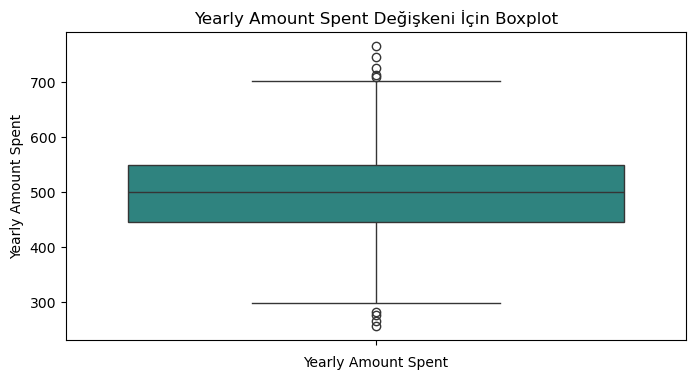

In [135]:
# Sayısal değişkenlerin seçimi
numerical_columns = customers.select_dtypes(exclude=['object']).columns

# Boxplot ile aykırı değer analizi
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(customers[col], palette="viridis")
    plt.title(f"{col} Değişkeni İçin Boxplot")
    plt.xlabel(col)
    plt.show()

# Veri ayırma

In [94]:
# bağımlı ve bağımsız değişkenler

X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [95]:
# veri setini ayırmak için ilgili fonksiyonu çağırdık
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Model eğitimi

In [97]:
# model eğitimi için ilgili kütüphanenin çağırılması
from sklearn.linear_model import LinearRegression

In [98]:
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
# r squared
model.score(X, y)

0.9842821675307221

In [101]:
# regresyon modeline ait katsayılar
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [137]:
# sabit katsayı (B0)
model.intercept_

-1050.6536746645716

In [143]:
# katsayıların DataFrame şeklinde gösterilmesi
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Katsayılar'])
print(cdf)

                      Katsayılar
Avg. Session Length    25.724256
Time on App            38.597135
Time on Website         0.459148
Length of Membership   61.674732


# Tahmin

In [114]:
y_pred = model.predict(X_test)
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Yıllık Harcama Miktarı vs. Model Tahminleri')

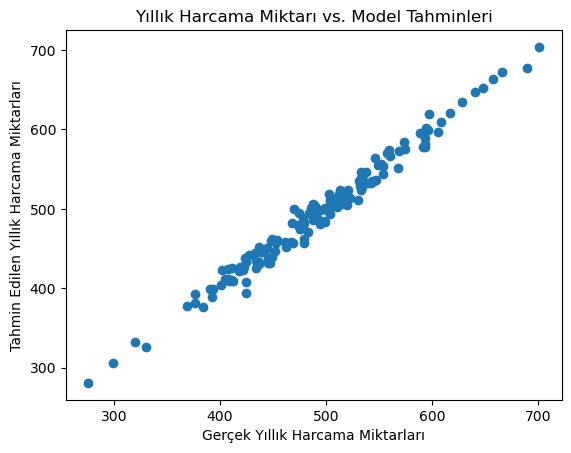

In [106]:
# Gerçek değerler ile tahmin değerleri arasındaki ilişki
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Yıllık Harcama Miktarları')
plt.ylabel('Tahmin Edilen Yıllık Harcama Miktarları')
plt.title('Yıllık Harcama Miktarı vs. Model Tahminleri')

# Model değerlendirme

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [112]:
print('Ortalama Mutlak Hatası:',mean_absolute_error(y_test, y_pred))
print('Ortalama Kare Hatası:',mean_squared_error(y_test, y_pred))
print('Kök Ortalama Kare Hatası:',math.sqrt(mean_squared_error(y_test, y_pred)))

Ortalama Mutlak Hatası: 8.426091641432125
Ortalama Kare Hatası: 103.91554136503339
Kök Ortalama Kare Hatası: 10.193897260863158


Text(0.5694444444444446, 0.5, 'Yoğunluk')

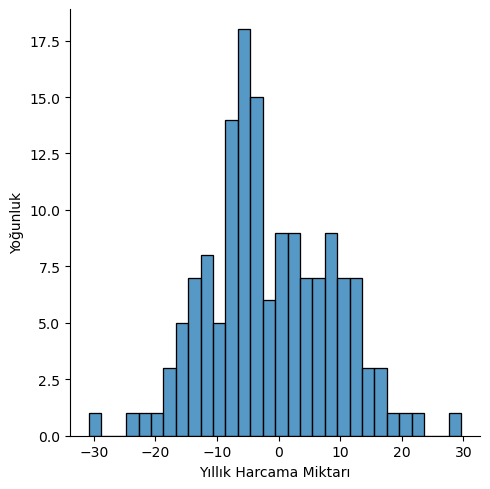

In [153]:
# Rezidülerin hesaplanması (hata)
residuals = y_test-y_pred

sns.displot(residuals, bins=30)
plt.xlabel('Yıllık Harcama Miktarı')
plt.ylabel('Yoğunluk')